In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_path = 'play_by_play_2021.csv'
AllPlayByPlay21 = pd.read_csv(csv_path)

# Grab only run/pass plays
PlayByPlay21 = AllPlayByPlay21[AllPlayByPlay21['play_type'].map(lambda play: play in ['run', 'pass'])]

# Grab desired columns
PlayByPlay21 = PlayByPlay21[['play_id', 'game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam',
                             'defteam', 'yardline_100', 'game_seconds_remaining', 'down', 'ydstogo', 'play_type',
                             'yards_gained', 'pass_length', 'run_gap', 'ep', 'epa']]

PlayByPlay21

/Users/scwoody411/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,play_id,game_id,home_team,away_team,season_type,week,posteam,defteam,yardline_100,game_seconds_remaining,down,ydstogo,play_type,yards_gained,pass_length,run_gap,ep,epa
2,55,2021_01_ARI_TEN,TEN,ARI,REG,1,TEN,ARI,75.0,3600.0,1.0,10,run,-3.0,NaN,tackle,1.474098,-1.399805
3,76,2021_01_ARI_TEN,TEN,ARI,REG,1,TEN,ARI,78.0,3563.0,2.0,13,pass,3.0,short,NaN,0.074293,0.032412
4,100,2021_01_ARI_TEN,TEN,ARI,REG,1,TEN,ARI,75.0,3522.0,3.0,10,pass,0.0,short,NaN,0.106705,-1.532898
6,152,2021_01_ARI_TEN,TEN,ARI,REG,1,ARI,TEN,61.0,3507.0,1.0,10,pass,38.0,deep,NaN,1.771485,2.692890
7,181,2021_01_ARI_TEN,TEN,ARI,REG,1,ARI,TEN,23.0,3475.0,1.0,10,run,2.0,NaN,end,4.464375,-1.009908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50522,3626,2021_21_SF_LA,LA,SF,POST,21,LA,SF,13.0,120.0,2.0,11,pass,-7.0,NaN,NaN,4.265301,-1.435470
50524,3662,2021_21_SF_LA,LA,SF,POST,21,LA,SF,20.0,115.0,3.0,18,pass,8.0,short,NaN,2.829831,0.053268
50528,3737,2021_21_SF_LA,LA,SF,POST,21,SF,LA,75.0,106.0,1.0,10,pass,0.0,short,NaN,0.826250,-0.238067
50529,3759,2021_21_SF_LA,LA,SF,POST,21,SF,LA,75.0,102.0,2.0,10,pass,-3.0,short,NaN,0.588183,-0.531692


## Average EPA Per Play
***Only Includes Run/Pass Plays**

### Functions

In [3]:
def CreateDataFrameTeamEPAs(FilterColumn=None, FilterFunction=None, OldDF=PlayByPlay21):
    
    # Filter Old DataFrame if Needed
    if FilterColumn != None:
        NewDF = OldDF[OldDF[FilterColumn].map(FilterFunction)]
    else:
        NewDF = OldDF

    # Create DataFrame of Off EPA by Team
    OffEPA = NewDF.groupby('posteam').mean()[['epa']]
    OffEPA.rename(columns={'epa': 'Off EPA'}, inplace=True)

    # Create DataFrame of Def EPA by Team
    DefEPA = NewDF.groupby('defteam').mean()[['epa']]
    DefEPA.rename(columns={'epa': 'Def EPA'}, inplace=True)

    # Merge DataFrames
    TeamEPAs = pd.merge(OffEPA, DefEPA, left_index=True, right_index=True)
    TeamEPAs.index.names = ["Team"]

    return TeamEPAs

In [4]:
def PlotScatterEPAs(EPAdf, xColumn='Off EPA', yColumn='Def EPA', MarkerLabel='Team',
                    xlims=(-0.25,0.25), ylims=(0.25,-0.25)):
    
    # Create Plot
    ScatterPlot = EPAdf.plot(xColumn, yColumn, kind='scatter', c='white', fontsize=14,
                             xlim=xlims, ylim=ylims, figsize=(20,10))

    # Quadrant Lines
    plt.axhline(0, linestyle='-', linewidth=4, color='lightgrey')
    plt.axvline(0, linestyle='-', linewidth=4, color='lightgrey')

    # Format Axes Labels
    plt.xlabel(f'\n{xColumn}', fontsize=16)
    plt.ylabel(yColumn, fontsize=16)

    # Label Markers with Team Name
    EPAdf.reset_index()[[xColumn,yColumn,MarkerLabel]].apply(
        lambda row: ScatterPlot.text(*row, size=16, weight='bold'),axis=1);

### All Plays*

In [5]:
TeamEPAs = CreateDataFrameTeamEPAs()

TeamEPAs.head()

,Off EPA,Def EPA
Team,,
ARI,0.051359,-0.041093
ATL,-0.100249,0.082050
BAL,0.005021,0.069608
BUF,0.143586,-0.096585
CAR,-0.137794,-0.044470


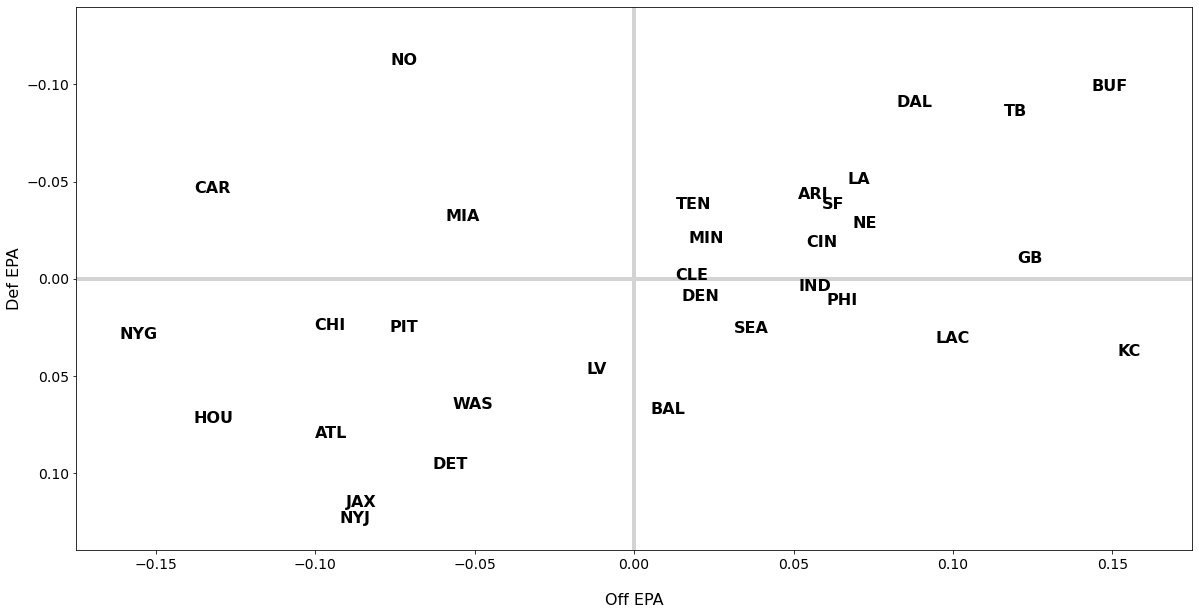

In [6]:
PlotScatterEPAs(TeamEPAs, xlims=(-0.175,0.175), ylims=(0.14,-0.14))

### RedZone Plays*

In [7]:
RedZoneEPAs = CreateDataFrameTeamEPAs('yardline_100', lambda yardline: yardline <= 20)

RedZoneEPAs.head()

,Off EPA,Def EPA
Team,,
ARI,0.041016,0.027280
ATL,0.009655,0.156959
BAL,0.094942,-0.002224
BUF,0.225269,-0.118062
CAR,-0.142186,0.217926


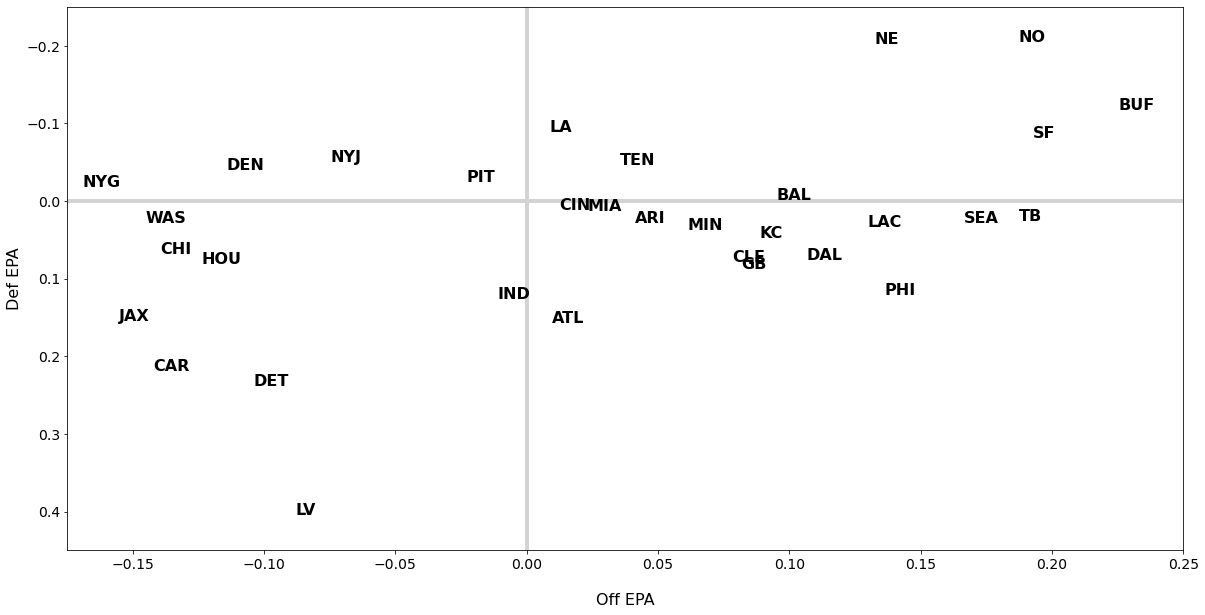

In [8]:
PlotScatterEPAs(RedZoneEPAs, xlims=(-0.175,0.25), ylims=(0.45,-0.25))

### 1st-Down Plays*

In [9]:
FirstDownEPAs = CreateDataFrameTeamEPAs('down', lambda down: down == 1)

FirstDownEPAs.head()

,Off EPA,Def EPA
Team,,
ARI,0.001004,0.022100
ATL,-0.090481,0.043560
BAL,0.051666,0.071284
BUF,0.110602,-0.061467
CAR,-0.044154,-0.015747


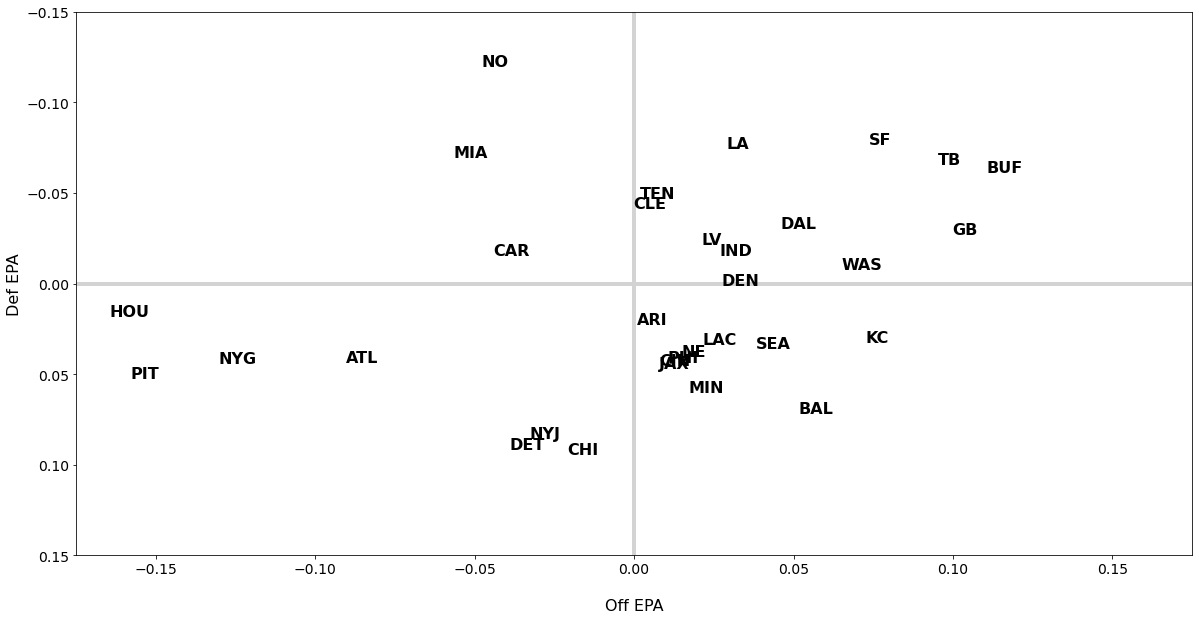

In [10]:
PlotScatterEPAs(FirstDownEPAs, xlims=(-0.175,0.175), ylims=(0.15,-0.15))

### 3rd-Down Plays*

In [11]:
ThirdDownEPAs = CreateDataFrameTeamEPAs('down', lambda down: down == 3)

ThirdDownEPAs.head()

,Off EPA,Def EPA
Team,,
ARI,0.177086,-0.171510
ATL,-0.156700,0.200409
BAL,-0.210027,-0.078736
BUF,0.195350,-0.205803
CAR,-0.334316,-0.129062


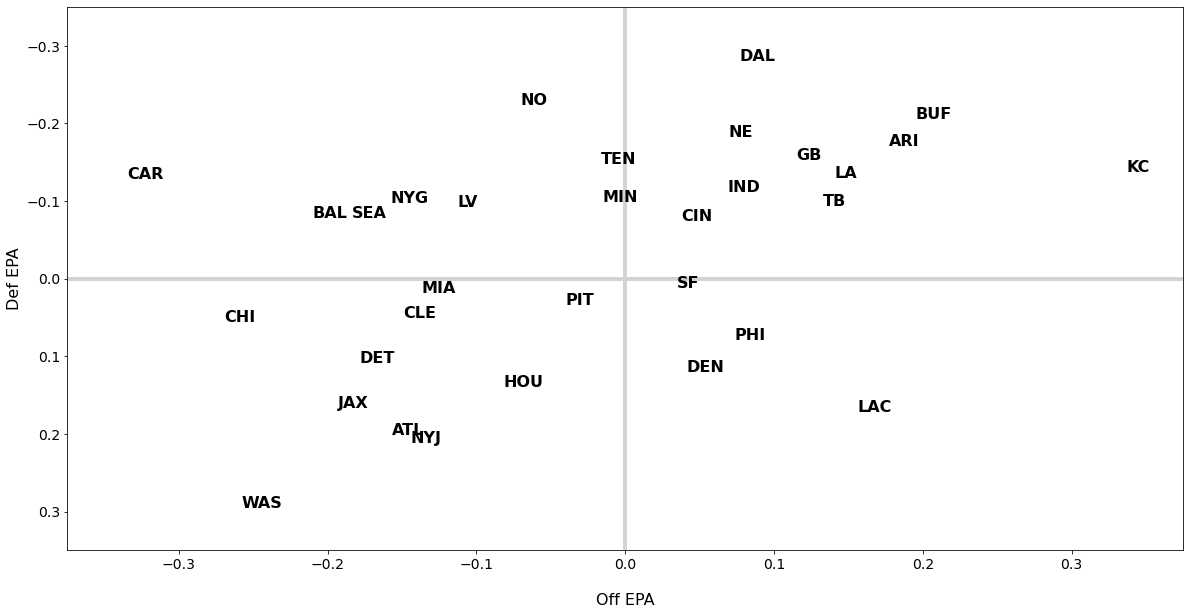

In [12]:
PlotScatterEPAs(ThirdDownEPAs, xlims=(-0.375,0.375), ylims=(0.35,-0.35))

### Last 2 Minutes of 1st Half*

In [13]:
FilterFunction = lambda second: (second > 1800) & (second <= 1920)
EndOfFirstHalfEPAs = CreateDataFrameTeamEPAs('game_seconds_remaining', FilterFunction)

EndOfFirstHalfEPAs.head()

,Off EPA,Def EPA
Team,,
ARI,0.187567,0.305707
ATL,0.052292,0.022740
BAL,-0.200228,0.054237
BUF,0.197594,-0.088686
CAR,0.026456,0.234552


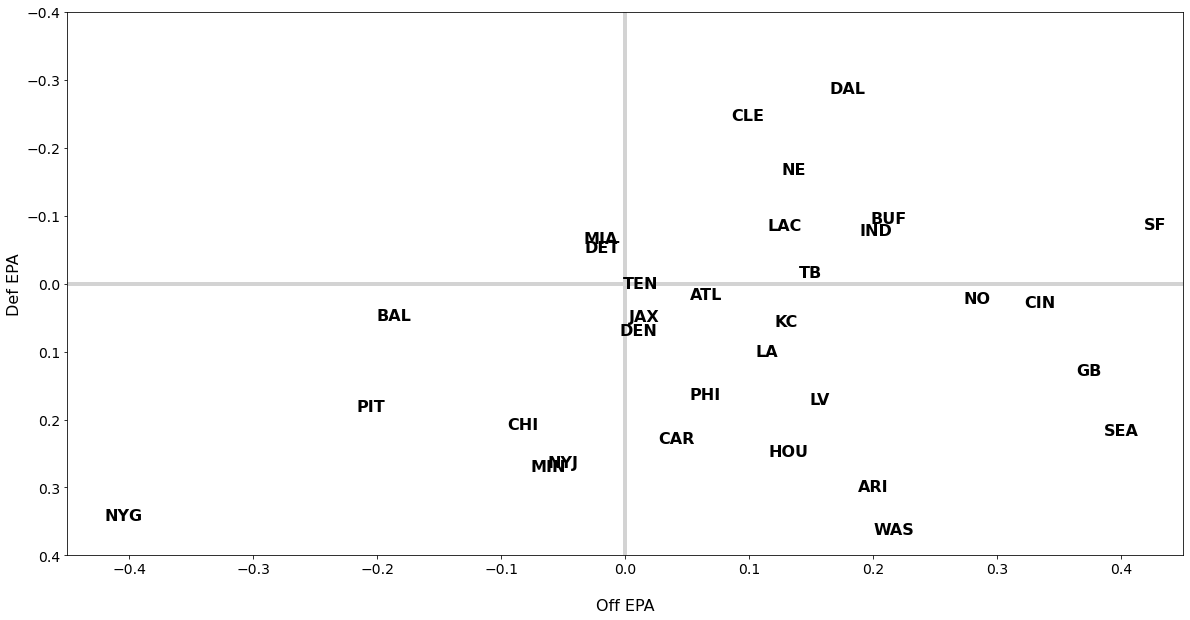

In [14]:
PlotScatterEPAs(EndOfFirstHalfEPAs, xlims=(-0.45,0.45), ylims=(0.4,-0.4))

### Punts

In [15]:
PuntEPAs = CreateDataFrameTeamEPAs('play_type', lambda play: play == 'punt', AllPlayByPlay21)

PuntEPAs.head()

,Off EPA,Def EPA
Team,,
ARI,-0.208683,-0.001444
ATL,-0.299424,-0.175564
BAL,-0.108790,-0.180083
BUF,-0.260207,-0.185584
CAR,-0.357211,-0.193099


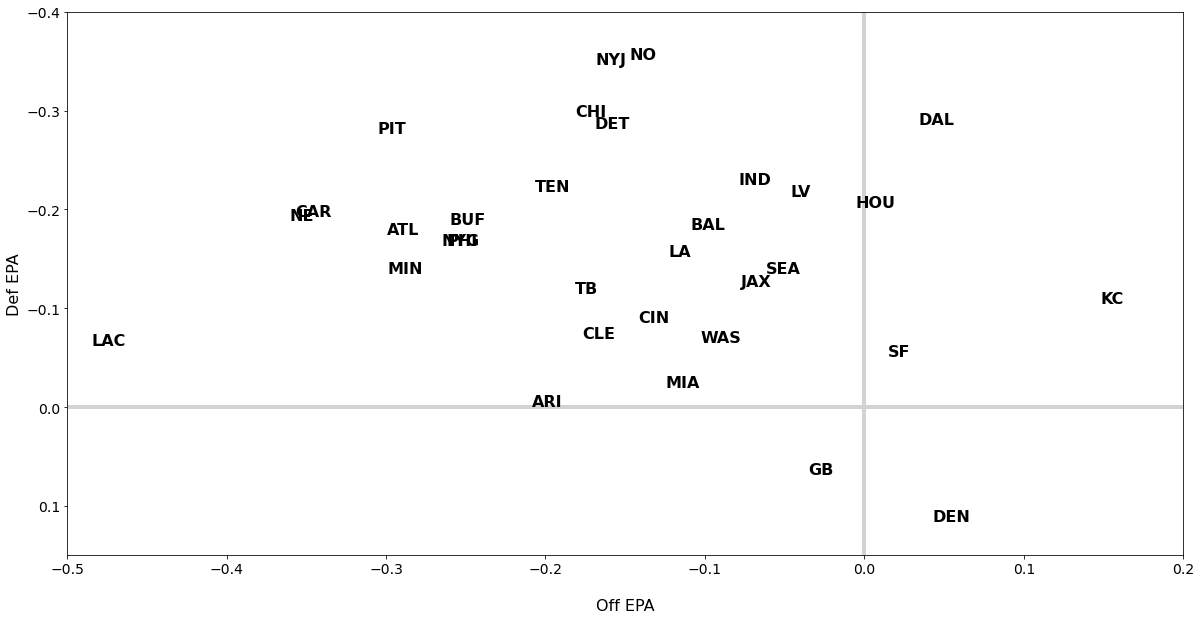

In [16]:
PlotScatterEPAs(PuntEPAs, xlims=(-0.5,0.2), ylims=(0.15,-0.4))

### Kickoffs

In [17]:
KickoffEPAs = CreateDataFrameTeamEPAs('play_type', lambda play: play == 'kickoff', AllPlayByPlay21)

KickoffEPAs.head()

,Off EPA,Def EPA
Team,,
ARI,-0.042417,0.023354
ATL,-0.011466,-0.025261
BAL,0.011704,-0.040141
BUF,-0.102069,-0.139967
CAR,0.041103,0.098443


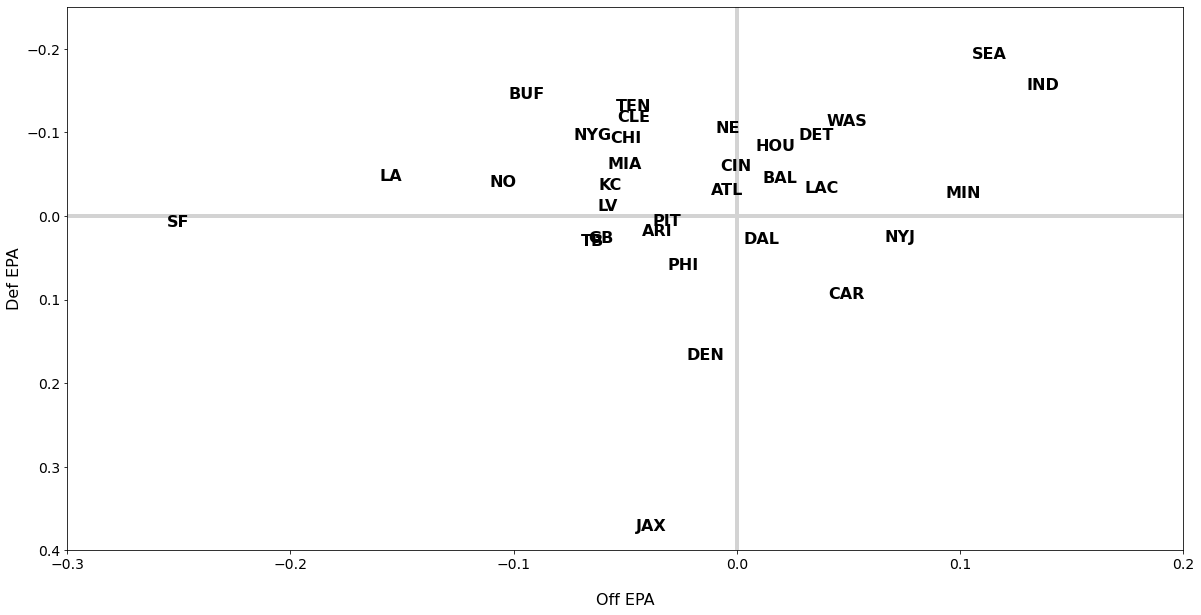

In [18]:
PlotScatterEPAs(KickoffEPAs, xlims=(-0.3,0.2), ylims=(0.4,-0.25))

### Special Teams Plays

### Home Run/Pass Plays

### Away Run/Pass Plays

In [21]:
# # Create Scatter Plot with TeamEPAs DataFrame

# # Create DataFrame of Team Colors
# TeamColors_dict = {
#     'Team': ['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX',
#              'KC', 'LA', 'LAC', 'LV', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN',
#              'WAS'],
#     'Color': ['red', 'red', 'purple', 'blue', 'blue', 'orange', 'orange', 'orange', 'blue', 'orange', 'blue',
#               'green', 'navy', 'blue', 'gold', 'red', 'yellow', 'blue', 'black', 'cyan', 'purple', 'navy', 'gold',
#               'navy', 'green', 'green', 'yellow', 'navy', 'red', 'red', 'blue', 'red']
# }
# ColorList = TeamColors_dict['Color']
# TeamColors = pd.DataFrame(TeamColors_dict).set_index('Team')

# # Merge TeamEPAs df with TeamColors df
# TeamColorEPAs = pd.merge(TeamEPAs, TeamColors, left_index=True, right_index=True)

# # Create plot
# ScatterTeamEPAs = TeamEPAs.plot('Off EPA', 'Def EPA', kind='scatter', c='white', ylim=(0.11,-0.125), figsize=(20,10))
# TeamEPAs.reset_index()[['Off EPA','Def EPA','posteam']].apply(lambda row: ScatterTeamEPAs.text(*row, c=ColorList, size='xx-large', weight='bold'),axis=1);


In [ ]:
# WeeklyTeamOffEPA = PlayByPlay21.groupby(['week', 'posteam']).mean()[['epa']]

# WeeklyTeamOffEPA